# One Sample Test of Central Tendency

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.graphics.api as smg

sns.set_style('whitegrid')

In [2]:
ideology = [1,2,3,4,5,6,7]
hispanic = [5,49,46,155,50,50,14]
black = [16,52,42,182,43,25,11]
white = [73,209,190,705,260,314,84]

In [3]:
gss = pd.DataFrame({
    'Ideology':ideology,
    'Hispanic':hispanic,
    'Black':black,
    'White':white
})
gss

,Ideology,Hispanic,Black,White
0,1,5,16,73
1,2,49,52,209
2,3,46,42,190
3,4,155,182,705
4,5,50,43,260
5,6,50,25,314
6,7,14,11,84


In [4]:
gss_sum = np.sum(np.multiply(gss['Ideology'],gss['Hispanic']))
gss_sum

1509

In [5]:
gss_mean = gss_sum / np.sum(gss['Hispanic'])
gss_mean

4.0894308943089435

In [6]:
ideology = [1,2,3,4,5,6,7]
hispanic = [5,49,46,155,50,50,14]

In [8]:
hisp = []
for ii in ideology:
    hisp += ([ii] * hispanic[ii-1])

In [9]:
hisp

[1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,


In [20]:
gss = pd.DataFrame({'Ideology':hisp})
gss

,Ideology
0,1
1,1
2,1
3,1
4,1
...,...
364,7
365,7
366,7
367,7


In [21]:
gss.describe()

,Ideology
count,369.000000
mean,4.089431
std,1.339258
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,7.000000


<Axes: ylabel='Frequency'>

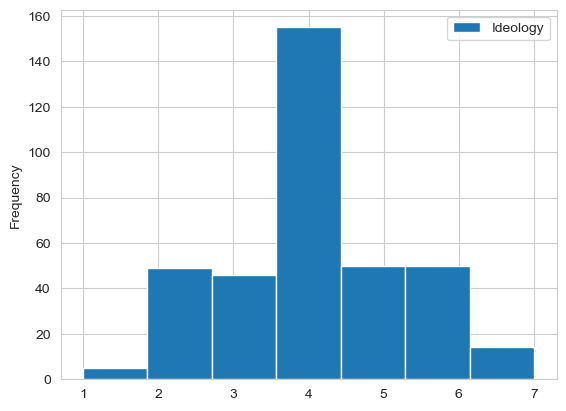

In [22]:
gss.plot(kind='hist', bins=7)

In [27]:
gss_hisp = gss['Ideology']

In [24]:
# Critical Value (rejection region)
zcrit = stats.norm.isf(0.05/2)
zcrit

1.9599639845400545

In [28]:
# point estimate
xbar = gss_hisp.mean()
xbar

4.0894308943089435

In [32]:
# standard error
sem = gss_hisp.std(ddof=1) / np.sqrt(len(gss_hisp))
sem

0.06971896384894542

In [34]:
# test statistic
z = (xbar - 4) / sem
z

1.2827341281592528

In [35]:
pval = 2 * stats.norm.sf(abs(z))
pval

0.19958523893184177

In [36]:
ci = stats.norm(loc=xbar, scale=sem).interval(0.95)
ci

(3.9527842361255603, 4.226077552492327)

# t Test

In [38]:
a = gss_hisp
popmean = 4.0
alternative = 'two-sided'

t, pval = stats.ttest_1samp(a=a,popmean=popmean, alternative=alternative)
print(f'The test statistic was t = {t:.2f} and the p-value was p = {pval:.2f}.')

The test statistic was t = 1.28 and the p-value was p = 0.20.


In [40]:
ci = stats.t(df=len(gss_hisp)-1, loc=gss_hisp.mean(), scale = gss_hisp.std()/np.sqrt(len(gss_hisp))).interval(0.95)
ci

(3.9523333438891632, 4.226528444728724)

# Wilcoxon Signed Rank Sum

In [41]:
distances = [-1.1, 1.9, -0.6, 1.6, -1.2, -3.2, -3.4, -1.9]
theta0 = 0

In [43]:
di = np.subtract(distances, theta0)

In [44]:
alternative = 'two-sided'
mode = 'exact'

In [45]:
W, pval = stats.wilcoxon(x=di, alternative=alternative, mode=mode)
print(f'The test statistic is {W} and the p-value is {pval:.3f}.')


The test statistic is 9.5 and the p-value is 0.250.


## Binomial test: One-sample test about proportions

Suppose two chess players face off in a tournament in 5 games. Player 1 beats Player 2 in all 5 games. Is Player 1 better than Player 2?

Hypothesis:
* Null: p=0.5
* Alternative: p>0.5

In [50]:
x = 5 # number of successes
n = 5 # number of trials
p = 0.5
alternative = 'greater'

pval = stats.binomtest(k=x, n=n, p=p, alternative=alternative)
pval.pvalue

0.03125

Yes, we can say with 95% confidence that Player 1 is better than Player 2.

Could we say that Player 1 and Player 2 are not evenly matched?
* Null: p=0.5
* Alternate: p!=0.5

In [51]:
pval = stats.binomtest(k=x, n=n, alternative='two-sided')
pval.pvalue

0.0625

In [52]:
stats.binom(n=n,p=p).interval(.95)

(0.0, 5.0)

---
# Progress Check

In [54]:
n = 1200
k = 624

pval = stats.binomtest(k=k, n=n, alternative='greater').pvalue
pval

0.08741407192070233

In [69]:
n = 1302
mu = 2.49
sigma = 0.85

stats.ttest_1samp(a=stats.t(df=n-1,loc=mu,scale=sigma).rvs(size=1302),popmean=2,alternative='greater')


TtestResult(statistic=22.376119502095015, pvalue=2.1790396625792247e-94, df=1301)

In [66]:
stats.norm(loc=2,scale=sigma).sf(mu)

0.28214857216416384